In [ ]:
from dataidea.packages import *
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
data = pd.read_csv('../assets/boston.csv')

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
X = data.drop('MEDV', axis=1)
y = data.MEDV

In [ ]:
knn_model = KNeighborsRegressor()
knn_model.fit(X, y)
score = knn_model.score(X, y)
predicted_y = knn_model.predict(X)

print('score:', score)

score: 0.7141417184855765


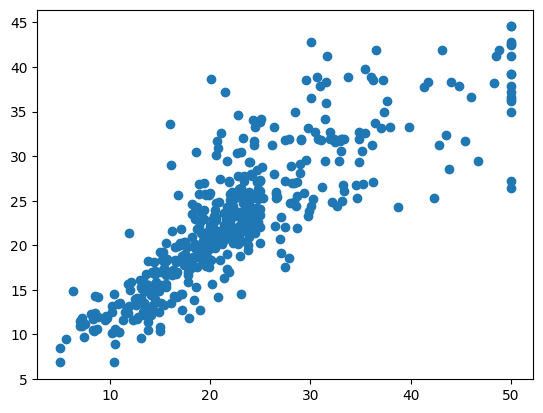

In [ ]:
plt.scatter(y, predicted_y)
plt.show()

In [ ]:
data_num = data.drop(['CHAS','RAD'], axis=1)
X = data_num.drop("MEDV", axis=1)
y = data_num.MEDV
X.shape
test_reg = SelectKBest(score_func=f_regression, k=6)
fit_boston = test_reg.fit(X, y)

print(fit_boston.scores_)
indexes = fit_boston.get_support(indices=True)
print(indexes)

[ 89.48611476  75.2576423  153.95488314 112.59148028 471.84673988
  83.47745922  33.57957033 141.76135658 175.10554288  63.05422911
 601.61787111]
[ 2  3  4  7  8 10]


In [ ]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

In [ ]:
new_X = data[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'CHAS','RAD']]

In [ ]:
knn_model = KNeighborsRegressor()
knn_model.fit(new_X, y)
new_score = knn_model.score(new_X, y)
new_predicted_y = knn_model.predict(new_X)

print('Feature selected score:', new_score)

Feature selected score: 0.8324963639640872


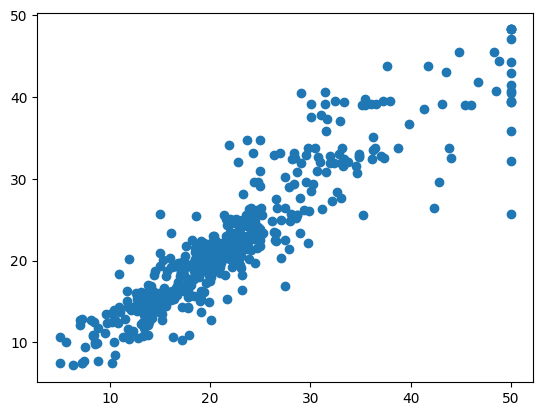

In [ ]:
plt.scatter(y, new_predicted_y)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd
scaler = StandardScaler()
standardized_data_num = scaler.fit_transform(data[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']])
standardized_data_num_df = pd.DataFrame(standardized_data_num, columns=['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT'])

In [ ]:
standardized_new_X = pd.concat([standardized_data_num_df, data[['CHAS', 'RAD']]], axis=1)

In [ ]:
knn_model = KNeighborsRegressor()
knn_model.fit(standardized_new_X, y)
new_stardard_score = knn_model.score(standardized_new_X, y)
new_predicted_y = knn_model.predict(standardized_new_X)

print('Standardized score:', new_stardard_score)

Standardized score: 0.8748479111294786


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', KNeighborsRegressor())
])

pipe.fit(new_X, y)
pipe_score = pipe.score(new_X, y)
pipe_predicted_y = pipe.predict(new_X)

print('Pipe Score:', pipe_score)

Pipe Score: 0.8596241377736238


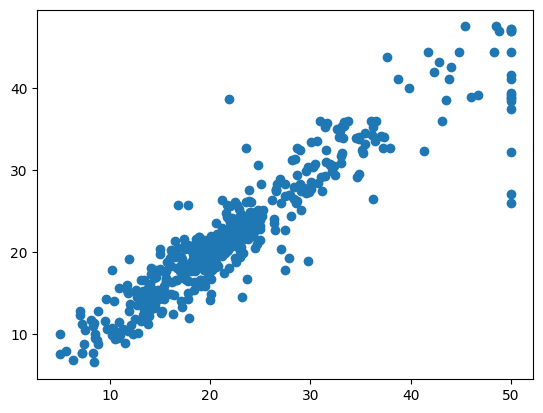

In [ ]:
plt.scatter(y, pipe_predicted_y)
plt.show()